# Testing the API

In [3]:
import requests

In [4]:
response = requests.get('http://statsapi.mlb.com/api/v1/schedule/games/?sportId=1&startDate=2019-03-28&endDate=2019-09-29')

In [5]:
data = response.json()

In [6]:
#data

In [7]:
game = requests.get(f"http://statsapi.mlb.com{data['dates'][0]['games'][0]['link']}")

In [8]:
games_json = game.json()

In [9]:
teams = games_json['gameData']
#teams

In [10]:
teamlist = []
teamlist.append(teams['teams']['away']['name'])
teamlist.append(teams['teams']['home']['name'])
teamlist

['New York Mets', 'Washington Nationals']

In [11]:
#game_ids = []
#for 

game_id = games_json['gameData']['game']['id']

In [12]:
game_id = 565895
game_info = requests.get(f"http://statsapi.mlb.com/api/v1/game/{game_id}/content")

In [13]:

json_info = game_info.json()

In [14]:
#json_info

In [15]:
json_info.keys()

dict_keys(['copyright', 'link', 'editorial', 'media', 'highlights', 'summary', 'gameNotes'])

# Questions

Who played the bottom 3 teams most often?
Who played the top 3 teams most often?
Does it seem that these teams' records were affected by this?

In [16]:
#Create edges between teams for each game

%matplotlib inline
import json
import random

import numpy as np
import pandas as pd
import networkx as nx

In [17]:
g = nx.Graph() # Build the graph

In [18]:

#Parse each game, grab teams as team1 and team2, and add weighted edge
# for dates, games, link, 

response = requests.get('http://statsapi.mlb.com/api/v1/schedule/games/?sportId=1&startDate=2019-03-28&endDate=2019-09-29')
season = response.json()

In [19]:
dates = season['dates']

In [20]:
date = dates[0]
game = date['games'][0]
teams = game['teams']
teams

{'away': {'leagueRecord': {'wins': 1, 'losses': 0, 'pct': '1.000'},
  'score': 2,
  'team': {'id': 121, 'name': 'New York Mets', 'link': '/api/v1/teams/121'},
  'isWinner': True,
  'splitSquad': False,
  'seriesNumber': 1},
 'home': {'leagueRecord': {'wins': 0, 'losses': 1, 'pct': '.000'},
  'score': 0,
  'team': {'id': 120,
   'name': 'Washington Nationals',
   'link': '/api/v1/teams/120'},
  'isWinner': False,
  'splitSquad': False,
  'seriesNumber': 1}}

In [21]:
#create list of lists of teams for each game
team_id_dict = {}
all_games = []
for i in dates:
    games = i['games']
    for game in games:
        #id = j['gamePk']
        #response = requests.get(f"http://statsapi.mlb.com/api/v1/game/{id}/content")
        #game = response.json()
        #print(game)
        teamlist = []
        teams = game['teams']
        teamlist.append(teams['away']['team']['name'])
        teamlist.append(teams['home']['team']['name'])
        all_games.append(teamlist)
        if teams['away']['team']['name'] in team_id_dict:
            pass
        else:
            team_id_dict[teams['away']['team']['name']] = teams['away']['team']['id']
        #print(teamlist)

len(all_games)
        

2471

In [22]:
"""
    for line in in_file:
        
        # Load the movie from this line
        this_movie = json.loads(line)
            
        # Create a node for every actor
        for actor_id,actor_name in this_movie['actors']:
            # Instead of passing, add the actor to the graph
            g.add_node(actor_id, name=actor_name)
            #pass
            
        # Iterate through the list of actors, generating all pairs
        #. Starting with the first actor in the list, generate pairs with all subsequent actors
        #. then continue to second actor in the list and repeat
        i = 0 # Counter in the list
        for left_actor_id,left_actor_name in this_movie['actors']:
            for right_actor_id,right_actor_name in this_movie['actors'][i+1:]:
                
                # Get the current weight, if it exists
                w = g.get_edge_data(left_actor_id,right_actor_id, default= {'weight':0})['weight']
                
                # Add an edge for these actors
                g.add_edge(left_actor_id, right_actor_id, weight = w+1)
                
                # Print edges
                #print(left_actor_name, "<->", right_actor_name)
                
            i += 1 # increment the counter
         
        
        #break
"""
print('')

In [23]:
for game in all_games:
    #print(game)
    for team in game:
        #print(team)
        g.add_node(team)
        
    i=0
    for away in game:
        #print("away:", away)
        for home in game[i+1:]:
            
            w = g.get_edge_data(away,home, default= {'weight':0})['weight']
            
            g.add_edge(away, home, weight=w+1)
            
            #print(away, "<->", home)
            
        i+=1
        
    #break

In [24]:
print(g.nodes)

['New York Mets', 'Washington Nationals', 'Baltimore Orioles', 'New York Yankees', 'St. Louis Cardinals', 'Milwaukee Brewers', 'Atlanta Braves', 'Philadelphia Phillies', 'Detroit Tigers', 'Toronto Blue Jays', 'Houston Astros', 'Tampa Bay Rays', 'Chicago Cubs', 'Texas Rangers', 'Los Angeles Angels', 'Oakland Athletics', 'Arizona Diamondbacks', 'Los Angeles Dodgers', 'Pittsburgh Pirates', 'Cincinnati Reds', 'San Francisco Giants', 'San Diego Padres', 'Cleveland Indians', 'Minnesota Twins', 'Colorado Rockies', 'Miami Marlins', 'Chicago White Sox', 'Kansas City Royals', 'Boston Red Sox', 'Seattle Mariners', 'National League All-Stars', 'American League All-Stars']


In [25]:
g.remove_node('American League All-Stars')
g.remove_node('National League All-Stars')

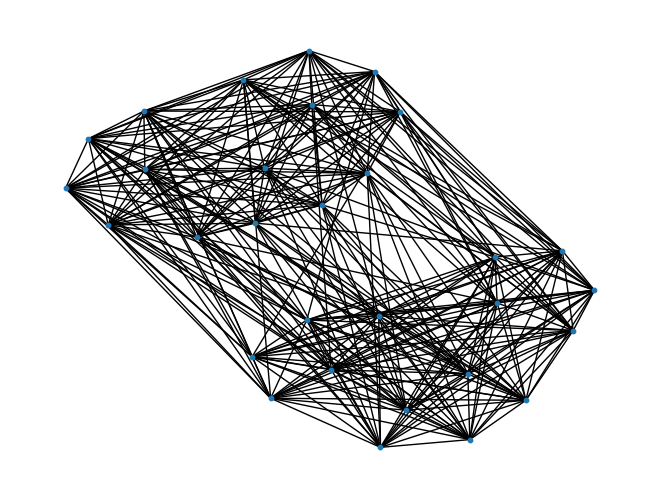

In [26]:
pos = nx.spring_layout(g, k=1)

nx.draw(g, pos, node_size=10, with_labels=False)

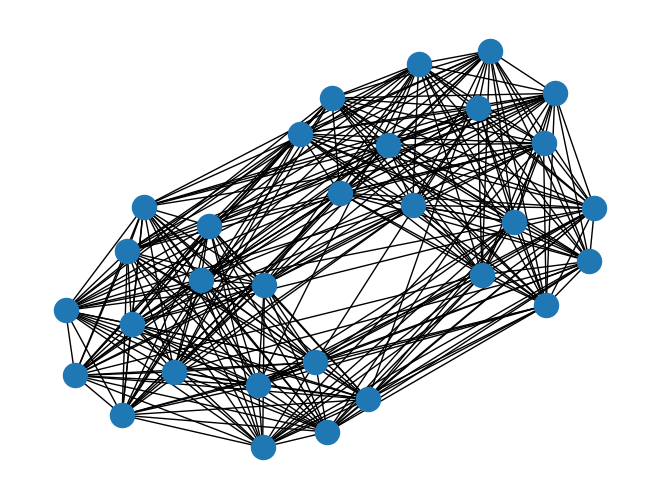

In [27]:
tigers = nx.ego_graph(g, "Detroit Tigers", radius=3, undirected=True)
nx.draw(tigers)


In [28]:
t_edge_dict = {}
tiger_edges = tigers.edges('Detroit Tigers')
for i in tiger_edges:
    t_edge_dict[i[1]] = (g.get_edge_data(i[0],i[1], default= {'weight':0})['weight'])
t_edge_dict


{'New York Mets': 3,
 'Washington Nationals': 3,
 'Baltimore Orioles': 7,
 'New York Yankees': 7,
 'Atlanta Braves': 3,
 'Philadelphia Phillies': 4,
 'Toronto Blue Jays': 7,
 'Kansas City Royals': 19,
 'Cleveland Indians': 19,
 'Minnesota Twins': 20,
 'Pittsburgh Pirates': 4,
 'Chicago White Sox': 23,
 'Boston Red Sox': 8,
 'Los Angeles Angels': 6,
 'Houston Astros': 7,
 'Oakland Athletics': 8,
 'Miami Marlins': 3,
 'Tampa Bay Rays': 6,
 'Texas Rangers': 6,
 'Seattle Mariners': 7}

In [29]:
astros = nx.ego_graph(g,'Houston Astros', radius=3, undirected=True)

In [30]:
a_edge_dict = {}
astros_edges = astros.edges('Houston Astros')
for i in astros_edges:
    a_edge_dict[i[1]] = (g.get_edge_data(i[0],i[1], default= {'weight':0})['weight'])
a_edge_dict

{'Baltimore Orioles': 6,
 'New York Yankees': 7,
 'St. Louis Cardinals': 3,
 'Milwaukee Brewers': 4,
 'Detroit Tigers': 7,
 'Toronto Blue Jays': 6,
 'Tampa Bay Rays': 7,
 'Texas Rangers': 19,
 'Oakland Athletics': 19,
 'Seattle Mariners': 19,
 'Minnesota Twins': 7,
 'Cleveland Indians': 7,
 'Los Angeles Angels': 19,
 'Kansas City Royals': 6,
 'Boston Red Sox': 6,
 'Chicago White Sox': 8,
 'Chicago Cubs': 3,
 'Cincinnati Reds': 3,
 'Pittsburgh Pirates': 3,
 'Colorado Rockies': 4}

In [31]:
#https://www.google.com/search?q=2019+mlb+standings&rlz=1C5CHFA_enUS864US864&oq=2019+MLB+standings&aqs=chrome.0.0i512j0i22i30l9.6773j0j7&sourceid=chrome&ie=UTF-8#sie=lg;/g/11fd6dgw5r;4;/m/09p14;st;fp;1;;;
#Graph of win percentage against connection with Tigers
#Order the edges by weight
sorted_by_weight = sorted(t_edge_dict.items(), key=lambda x:x[1], reverse=True)
tiger_dict = dict(sorted_by_weight)

teams = list(tiger_dict.keys())
weights = list(tiger_dict.values())

tiger_dict

{'Chicago White Sox': 23,
 'Minnesota Twins': 20,
 'Kansas City Royals': 19,
 'Cleveland Indians': 19,
 'Boston Red Sox': 8,
 'Oakland Athletics': 8,
 'Baltimore Orioles': 7,
 'New York Yankees': 7,
 'Toronto Blue Jays': 7,
 'Houston Astros': 7,
 'Seattle Mariners': 7,
 'Los Angeles Angels': 6,
 'Tampa Bay Rays': 6,
 'Texas Rangers': 6,
 'Philadelphia Phillies': 4,
 'Pittsburgh Pirates': 4,
 'New York Mets': 3,
 'Washington Nationals': 3,
 'Atlanta Braves': 3,
 'Miami Marlins': 3}

In [32]:
#Graph of win percentage against connection with Tigers
#Order the edges by weight
sorted_by_weight = sorted(a_edge_dict.items(), key=lambda x:x[1], reverse=True)
astros_dict = dict(sorted_by_weight)

teams = list(astros_dict.keys())
weights = list(astros_dict.values())

astros_dict

{'Texas Rangers': 19,
 'Oakland Athletics': 19,
 'Seattle Mariners': 19,
 'Los Angeles Angels': 19,
 'Chicago White Sox': 8,
 'New York Yankees': 7,
 'Detroit Tigers': 7,
 'Tampa Bay Rays': 7,
 'Minnesota Twins': 7,
 'Cleveland Indians': 7,
 'Baltimore Orioles': 6,
 'Toronto Blue Jays': 6,
 'Kansas City Royals': 6,
 'Boston Red Sox': 6,
 'Milwaukee Brewers': 4,
 'Colorado Rockies': 4,
 'St. Louis Cardinals': 3,
 'Chicago Cubs': 3,
 'Cincinnati Reds': 3,
 'Pittsburgh Pirates': 3}

In [33]:
ttop4 = dict(list(tiger_dict.items())[:4])
atop4 = dict(list(astros_dict.items())[:4])


In [34]:
ttop4


{'Chicago White Sox': 23,
 'Minnesota Twins': 20,
 'Kansas City Royals': 19,
 'Cleveland Indians': 19}

In [35]:
#Create table for information above
tigers_table = pd.DataFrame()
tigers_table['Team'] = list(ttop4.keys())
tigers_table['Appearances Against Tigers'] = list(ttop4.values())

In [36]:
tigers_table

,Team,Appearances Against Tigers
0,Chicago White Sox,23
1,Minnesota Twins,20
2,Kansas City Royals,19
3,Cleveland Indians,19


In [37]:
atop4

{'Texas Rangers': 19,
 'Oakland Athletics': 19,
 'Seattle Mariners': 19,
 'Los Angeles Angels': 19}

In [38]:
astros_table = pd.DataFrame()
astros_table['Team'] = list(atop4.keys())
astros_table['Appearances Against Astros'] = list(atop4.values())


In [39]:
astros_table

,Team,Appearances Against Astros
0,Texas Rangers,19
1,Oakland Athletics,19
2,Seattle Mariners,19
3,Los Angeles Angels,19


In [40]:
for i in list(team_id_dict.keys()):
    id = team_id_dict[i]
    response = requests.get(f"http://statsapi.mlb.com/api/v1/teams/{id}")
    j = response.json()


In [41]:
j['teams'][0].keys()

dict_keys(['allStarStatus', 'id', 'name', 'link', 'season', 'venue', 'teamCode', 'fileCode', 'abbreviation', 'teamName', 'locationName', 'firstYearOfPlay', 'league', 'sport', 'shortName', 'franchiseName', 'clubName', 'active'])

In [42]:
# try to get win pcts from only final date of season
win_pct_dict = {}
for i in data['dates']:
    if i['date'] == '2019-09-29':
        #print(i)
        for j in i['games']:
            #print(j['teams']['away']['team']['name'])
            win_pct_dict[j['teams']['away']['team']['name']] = j['teams']['away']['leagueRecord']['pct']
            win_pct_dict[j['teams']['home']['team']['name']] = j['teams']['home']['leagueRecord']['pct']
    else:
        pass
    
#win_pct_dict


In [43]:
import statistics as stat

In [44]:
win_pct = {}
#vals = list(win_pct_dict.values())
for i in list(win_pct_dict.keys()):
    win_pct[i] = float(win_pct_dict[i])

In [45]:
avg_win_pct = stat.mean(list(win_pct.values()))
print(f'Average Win Percentage: {round(avg_win_pct, 4)}')

Average Win Percentage: 0.4999


In [46]:
#Create a dictionary for win pct of only top 4 for each team

#Tigers
tpct = {}
for i in tiger_dict:
    for j in win_pct_dict:
        if i == j:
            tpct[i] = win_pct_dict[i]
            
tpct

#Astros
apct = {}
for i in astros_dict:
    for j in win_pct_dict:
        if i == j:
            apct[i] = win_pct_dict[i]


In [47]:
tpct

{'Chicago White Sox': '.447',
 'Minnesota Twins': '.623',
 'Kansas City Royals': '.364',
 'Cleveland Indians': '.574',
 'Boston Red Sox': '.519',
 'Oakland Athletics': '.599',
 'Baltimore Orioles': '.333',
 'New York Yankees': '.636',
 'Toronto Blue Jays': '.414',
 'Houston Astros': '.660',
 'Seattle Mariners': '.420',
 'Los Angeles Angels': '.444',
 'Tampa Bay Rays': '.593',
 'Texas Rangers': '.481',
 'Philadelphia Phillies': '.500',
 'Pittsburgh Pirates': '.426',
 'New York Mets': '.531',
 'Washington Nationals': '.574',
 'Atlanta Braves': '.599',
 'Miami Marlins': '.352'}

In [48]:
apct

{'Texas Rangers': '.481',
 'Oakland Athletics': '.599',
 'Seattle Mariners': '.420',
 'Los Angeles Angels': '.444',
 'Chicago White Sox': '.447',
 'New York Yankees': '.636',
 'Detroit Tigers': '.292',
 'Tampa Bay Rays': '.593',
 'Minnesota Twins': '.623',
 'Cleveland Indians': '.574',
 'Baltimore Orioles': '.333',
 'Toronto Blue Jays': '.414',
 'Kansas City Royals': '.364',
 'Boston Red Sox': '.519',
 'Milwaukee Brewers': '.549',
 'Colorado Rockies': '.438',
 'St. Louis Cardinals': '.562',
 'Chicago Cubs': '.519',
 'Cincinnati Reds': '.463',
 'Pittsburgh Pirates': '.426'}

In [49]:
apct_table = pd.DataFrame()
apct_table['Team'] = list(apct.keys())
apct_table['2019 Win Percentage'] = list(apct.values())
h_table = apct_table.head(4)
h_table

,Team,2019 Win Percentage
0,Texas Rangers,.481
1,Oakland Athletics,.599
2,Seattle Mariners,.420
3,Los Angeles Angels,.444


In [50]:
pcts = []
for i in list(h_table['2019 Win Percentage']):
    pcts.append(float(i))

avg = stat.mean(pcts)
avg = str(avg).split('0')

h_table.loc[len(h_table.index)] = ['Average', avg[1]]
h_table

/var/folders/1v/jxz0vfs91r590633ws8rsh7r0000gn/T/ipykernel_40309/360497696.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_table.loc[len(h_table.index)] = ['Average', avg[1]]


,Team,2019 Win Percentage
0,Texas Rangers,.481
1,Oakland Athletics,.599
2,Seattle Mariners,.420
3,Los Angeles Angels,.444
4,Average,.486


In [51]:
tpct_table = pd.DataFrame()
tpct_table['Team'] = list(tpct.keys())
tpct_table['2019 Win Percentage'] = list(tpct.values())
d_table = tpct_table.head(4)
d_table

,Team,2019 Win Percentage
0,Chicago White Sox,.447
1,Minnesota Twins,.623
2,Kansas City Royals,.364
3,Cleveland Indians,.574


In [52]:
pcts = []
for i in list(d_table['2019 Win Percentage']):
    pcts.append(float(i))

avg = stat.mean(pcts)
avg = str(avg).split('0')

d_table.loc[len(d_table.index)] = ['Average', f'{avg[1]}00']
d_table

/var/folders/1v/jxz0vfs91r590633ws8rsh7r0000gn/T/ipykernel_40309/1156156897.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_table.loc[len(d_table.index)] = ['Average', f'{avg[1]}00']


,Team,2019 Win Percentage
0,Chicago White Sox,.447
1,Minnesota Twins,.623
2,Kansas City Royals,.364
3,Cleveland Indians,.574
4,Average,.500
